Entrer nom, prenom et groupe ici

# TP6 : Vraisemblance

In [58]:
# Chargement des librairies
from matplotlib import pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

## Problème 1##

On considère les données $X_j=(X_{j1},X_{j2})\mapsto Y_j$, pour $j\in\{1,2,3,4\}$, avec :

$X_1=(2,0)$, $X_2=(3,2)$, $X_3=(0,3)$. $X_3=(3,4)$, et

$Y_1=0$, $Y_2=0$, $Y_3=1$, $Y_4=1$.

Ces données sont représentées ci-dessous.

In [59]:
# Définition des données
# remarquer que X est une liste de couples [Xj1,Xj2]

X=np.array([[2,0],[3,2],[0,3],[3,4]])
Y=np.array([0,0,1,1])

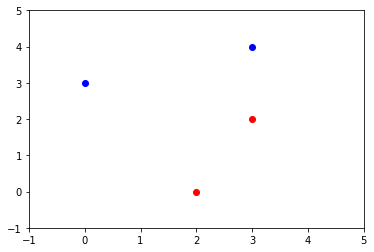

In [42]:
#Représentation graphique des données

#Fenêtre :
plt.axis([-1,5,-1,5]) #xmin,xmax,ymin,ymax

# Points :
# - on utilise X[a:b] pour avoir la liste des X entre a, inclus, et b, non inclus
# - on utilise X[...,0] pour avoir la première coodonnée des X
#   et X[...,1] pour avoir la deuxième coordonée des X
plt.plot(X[0:2,0],X[0:2,1],'o',c='red')
plt.plot(X[2:4,0],X[2:4,1],'o',c='blue')

**Exercice 1**

Expliquer la signification du code `X[2:4,1]` ci-dessus

Répondre ici

Dans la suite, on va chercher des coefficients $b$ et $W=\begin{pmatrix}w_1\\w_2\end{pmatrix}$ maximisant la vraisemblance de la loi de probabilité $$\Pr(Y=1|X)=\sigma(b+w_1x_1+w_2x_2).$$
où $\sigma$ est la fonction sigmoïde, définie pour tout $x$ dans $R$ par $$\sigma(x)=\frac{1}{1+e^{-x}}.$$

La vraisemblance de cette loi est donnée par 
$$L(b,w_1,w_2)=\prod\limits_{j:Y_j=1}\sigma(b+w_1x_{j1}+w_2x_{j2})\times\prod\limits_{j:Y_j=0}(1-\sigma(b+w_1x_{j1}+w_2x_{j2}))$$

On rappelle (vu en cours) que $\sigma(x)\simeq 1$ dès que $x>>0$ ($x$ très supérieur à $0$), et $\sigma(x)\simeq 0$ dès que $x<<0$ ($x$ très inférieur à $0$).

La vraisemblance est donc grande si les coefficients $b$, $w_1$ et $w_2$ vérifient pour tout $j\in\{1,2,3,4\}$ :

$$(C_j):\left\{\begin{array}{l}b+w_1x_{j1}+w_2x_{j2}>>0\text{ si }Y_j=1\\b+w_1x_{j1}+w_2x_{j2}<<0\text{ si }Y_j=0\end{array}\right.$$


**Exercice 2**

Ecrire les 4 conditions $(C_j)$ que doivent satisfaire $b$, $w_1$ et $w_2$ :

Condition (C1) issue de la donnée X1,Y1 :
...
Condition (C2) issue de la donnée X2,Y2 :
...
Condition (C3) issue de la donnée X3,Y3 :
...
Condition (C4) issue de la donnée X4,Y4 :
...

**Exercice 3**

1) Proposer une valeur pour $b$, $w_1$, $w_2$ satisfaisant les 4 conditions précédente



Réponse :
b=...., w1=...., w2=....

2) Compléter le code ci-dessous afin de compléter le graphique généré avec la droite d'équation $b+w_1x_1+w_2x_2=0$

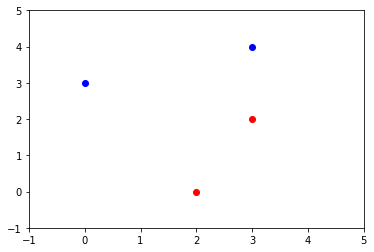

In [43]:
plt.axis([-1,5,-1,5]) #xmin,xmax,ymin,ymax
plt.plot(X[0:2,0],X[0:2,1],'o',c='red')
plt.plot(X[2:4,0],X[2:4,1],'o',c='blue')
# Droite b+w1x1+w2x2=0 <=> x2=(-b-w1*x1)/w2
plt.plot([-1,5],[...?,...?])

3) En quels points $(x_1,x_2)$ du graphique a-t-on $\sigma(b+w_1x_1+w_2x_2)>0.5$ et en quels points du graphique a-t-on $\sigma(b+w_1x_1+w_2x_2)<0.5$ ?

In [ ]:
Répondre ici

**Exercice 2**

Le code ci-dessous définit la fonction sigmoïde $\sigma$

In [33]:
def sigma(x):
    return 1/(1+np.exp(-x))

Retrouve-t-on, à partir des courbes de niveau de la fonction $\sigma(b+w_1x_2+w_2x_2)$ représentées ci-dessous (en ajustant correctement les valeurs de $b$, $w_1$, $w_2$) la réponse à la question 3 de l'exercice précédent ?

Répondre ici

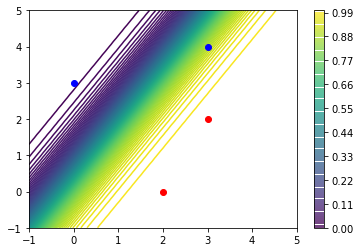

In [60]:
# Nuage de points
plt.axis([-1,5,-1,5])
plt.plot(X[0:2,0],X[0:2,1],'o',c='red')
plt.plot(X[2:4,0],X[2:4,1],'o',c='blue')

# Courbes de niveau de la fonction sigma(b+w1x1+w2x2)

# Calcul du tableau de valeurs (changer b, w1, w2)
x1list=np.linspace(-1,5,50)
x2list=np.linspace(-1,5,50)
sigmalist=[[sigma(1+3*x1-2*x2) for x1 in x1list] for x2 in x2list]
# Dessin des courbes de niveau
plt.contour(x1list,x2list,sigmalist,100) # dessine 100 courbes de niveau de sigma(b+w1x1+w2x2)
plt.colorbar()

# Problème 2 #

Dans la suite, on généralise les résultats précédents avec un nuage de 40 données

In [51]:
# Cette cellule n'est à exécuter qu'une fois, afin de générer des données aléatoires,
# et afin de les recopier dans la cellule suivante

# Création aléatoire des données :
# on génère 40 données (Xj,Yj), avec Xj=(xj1,xj2), Y=0 ou 1
# données centrées autour de 2 centres
X, Y = make_blobs(n_samples=40, centers=[[-0.5,-0.5],[0.5,0.5]], n_features=2, cluster_std=0.5,center_box=(-1,1))
print('Liste des [Xj1,Xj2] (à copier coller dans la cellule ci-dessous): \n\n',np.array2string(X,separator=',',max_line_width=10000).replace('\n', ''))
print('\nListe des Yj (à copier coller dans la cellule ci-dessous): \n\n',np.array2string(Y,separator=',',max_line_width=10000).replace('\n', ''))

Liste des [Xj1,Xj2] (à copier coller dans la cellule ci-dessous): 

 [[ 1.61260109, 0.45898484], [-0.25209377,-0.64190166], [-0.50929719,-1.04334503], [-0.2136444 , 0.62872077], [-0.65808757,-0.06634847], [-0.67531015, 0.85486592], [ 0.50832885, 0.11765617], [ 0.16417586,-0.50762127], [-0.52428799,-0.66621697], [ 0.89207873,-0.27536486], [-0.34547184,-0.06425037], [ 0.45401693, 0.81145769], [-0.56978039,-0.72962848], [ 0.32466091, 0.36624476], [ 1.59589445, 0.12257264], [ 1.13950298, 1.02098039], [-0.99673035,-0.30741149], [-1.50434002,-0.68522636], [ 0.7231777 , 0.27111741], [ 0.13373583, 1.12713442], [-0.54194144,-1.00332155], [ 0.80005194,-0.32807476], [ 1.18820512,-0.66438854], [ 0.59232489, 0.65840445], [-0.12269724, 0.29639507], [-1.17747388,-0.71463825], [-0.33343383,-0.8166646 ], [ 0.50367377, 0.46411453], [-0.56943257,-0.94252403], [-0.0091674 ,-0.66337193], [ 0.57583307, 0.2320534 ], [-0.15610825, 0.54328728], [-0.20124005,-0.83053847], [ 0.96628983, 0.6503559 ], [ 0.64787647

In [61]:
# Modifier en copiant collant avec les données générées aléatoirement ci-dessus
# attention à bien identifier les crochets fermant et ouvrant

X=np.array(copier la liste des X ici)
Y=np.array(copier la liste des Y ici)

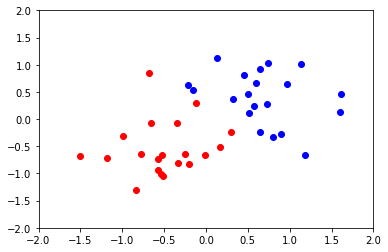

In [62]:
# Visualisation du nuage de points
plt.axis([-2,2,-2,2]) # (xmin,xmax,ymin,ymax)
plt.plot(X[(Y==0), 0], X[(Y==0), 1],'o',c='red') # en touge les points (Xj1,Xj2) tels que Y=0
plt.plot(X[(Y==1), 0], X[(Y==1), 1],'o',c='blue') # en bleu les points (Xj1,Xj2) tels que Y=0

1) Par lecture du nuage, déterminer des conditions sur $b$, $w_1$, $w_2$ afin que $b+w_1x_1+w_2x_2>>0$ pour les points $(x_1,x_2)$ représentés en bleu (correspondants à $Y=1$), et $b+w_1x_1+w_2x_2<<0$ pour les points représentées en rouge (correspondants à $Y=0$).

Conditions :

2) Déterminer des valeurs de $b$, $w_1$ et $w_2$ satisfaisant ces conditions, afin que la droite d'équation $b+w_1x_1+w_2x_2=0$ sépare les points bleus (correspondants à $Y=1$) des points rouges (correspondants à $Y=0$) du mieux possible.

Réponse :
b=
w1=
w2=

3) Représenter à l'aide de la cellule ci-dessus le nuage de points ainsi que la droite d'équation $b+w1x1+w2x2=0$.

4) Combien la loi $\Pr(Y=1|X)=\sigma(b+w1x1+w2x2)$ produit-elle de faux positifs (tels que $\sigma(b+w1x_{j1}+w2x_{j2})>0.5$ alors que $Y_j=0$) et combien produit-elle de faux négatifs (tels que $\sigma(b+w1x_{j1}+w2x_{j2})<0.5$ alors que $Y_j=1$) ?

Réponse :

Nombre de faux positifs :
Nombre de faux négatifs :

5) Représenter à l'aide de la cellule ci-dessus le nuage de points ainsi que les courbes de niveau de la fonction $\sigma(b+w_1x_1+w_2x_2)$.